In [2]:
import numpy as np
import scipy as sp
import pandas as pd

In [3]:
state = pd.read_csv(r"C:\Users\yusuf\Downloads\state.csv")
state["Murder.Rate"].mean() #Normal mean değer
state.set_index("State")

,Population,Murder.Rate,Abbreviation
State,,,
Alabama,4779736,5.7,AL
Alaska,710231,5.6,AK
Arizona,6392017,4.7,AZ
Arkansas,2915918,5.6,AR
California,37253956,4.4,CA
Colorado,5029196,2.8,CO
Connecticut,3574097,2.4,CT
Delaware,897934,5.8,DE
Florida,18801310,5.8,FL


In [4]:
np.average(state['Murder.Rate'], weights=state['Population']) #Nüfus ile ağırlıklandırılmış ortalama


4.445833981123393

In [5]:
state.loc[state["Murder.Rate"].idxmax()]#Getting the state with maximum murder rate

State           Louisiana
Population        4533372
Murder.Rate          10.3
Abbreviation           LA
Name: 17, dtype: object

In [6]:
state.loc[state["Murder.Rate"].idxmin()]

State           New Hampshire
Population            1316470
Murder.Rate               0.9
Abbreviation               NH
Name: 28, dtype: object

In [7]:
state["Population"].std()

6848235.347401142

In [8]:
state["Population"].quantile(0.75)-state["Population"].quantile(0.25)#Variance

4847308.0

In [9]:
#Data dağılımı
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

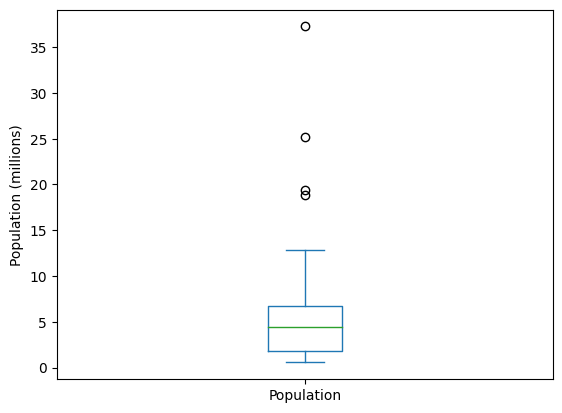

In [11]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')
#Kutu 0.25 ve 0.75 yüzdeliği gösteriyor çizgiler outlier değerler

In [15]:
#10 Aralığa bölerek datayı gösterme
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()



(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

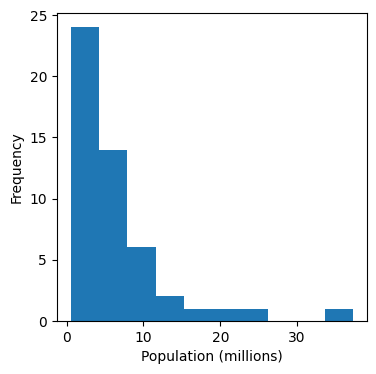

In [16]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')


Text(0.5, 0, 'Murder Rate (per 100,000)')

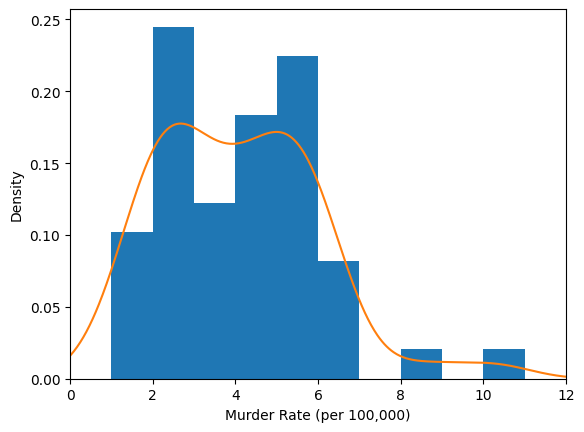

In [17]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [19]:
dfw = pd.read_csv(r"C:\Users\yusuf\Downloads\airline_stats.csv")
dfw

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [23]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

TypeError: no numeric data to plot